In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from hoki.constants import BPASS_METALLICITIES, BPASS_NUM_METALLICITIES
import matplotlib as mpl
from pylab import cm
from matplotlib.ticker import NullFormatter

In [2]:
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.linewidth'] = 2

path = "../data/"

In [6]:
data = h5py.File(f"{path}/data.h5", "r")
SFH = data["SFH"]

In [7]:
h = SFH.attrs['h']
omega_M = SFH.attrs['omega_M']
omega_L = SFH.attrs['omega_L']

In [9]:
NUM_COLORS = len(BPASS_METALLICITIES)
cm = plt.get_cmap('coolwarm')
cmap = plt.get_cmap("coolwarm", NUM_COLORS)
norm = mpl.colors.BoundaryNorm(np.arange(NUM_COLORS+1)+0.5,NUM_COLORS)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
BPASS_METALS = ["10$^{-5}$","10$^{-4}$","0.001", "0.002", "0.003", "0.004", "0.006", "0.008", "0.010", "0.014", "0.020", "0.030", "0.040" ]

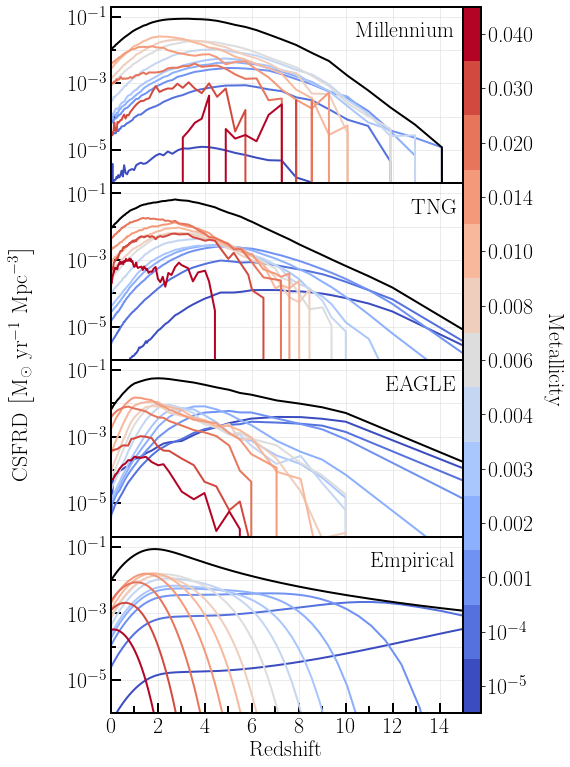

In [18]:
fig = plt.figure(figsize=(8,13))
fig.subplots_adjust(wspace=0, hspace=0, right=0.9, left=0.18)

########
#  MS  #
########
ax1 = plt.subplot(411)
#plt.setp(ax1.get_xticklabels(), visible=False)

ax1.set_ylim(9.999999e-7, 2e-1)
ax1.set_xlim(0, 15)

for i, Z in enumerate(BPASS_METALLICITIES):
    ax1.plot(SFH['millimillennium'].attrs["redshift"], SFH["millimillennium"][i], label=Z, color=cmap(i),lw=2)
    
ax1.plot(SFH['millimillennium'].attrs["redshift"], np.sum(SFH["millimillennium"], axis=0), label='total', color='black',lw=2)


ax1.set_yscale('log')

ax1.yaxis.set_major_locator(mpl.ticker.LogLocator(10, numticks=4))
ax1.yaxis.set_minor_locator(mpl.ticker.LogLocator(10, numticks=8))

ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in',left=True, right=False)
ax1.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',left=True, right=False)
ax1.yaxis.set_minor_formatter(NullFormatter())

ax1.grid(alpha=0.3)
ax1.grid(True, which="minor", axis="y", alpha=0.3)


plt.setp(ax1.get_xticklabels(), visible=False)

ax1.text(0.98, 0.86,"Millennium", verticalalignment='center', horizontalalignment='right',
        transform=ax1.transAxes)


#########
#  TNG  #
#########


ax2 = plt.subplot(412, sharey=ax1, sharex=ax1)
ax2.grid(alpha=0.3)
ax2.grid(True, which="minor", axis="y", alpha=0.3)

for i, Z in enumerate(BPASS_METALLICITIES):
    ax2.plot(SFH['TNG'].attrs["redshift"], SFH["TNG"][i], color=cmap(i), lw=2)
ax2.plot(SFH['TNG'].attrs["redshift"], np.sum(SFH["TNG"], axis=0), color='black', lw=2)


ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in',left=True, right=False)
ax2.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',left=True, right=False)
ax2.yaxis.set_minor_formatter(NullFormatter())


plt.setp(ax2.get_xticklabels(), visible=False)

ax2.text(0.98, 0.86,"TNG", verticalalignment='center', horizontalalignment='right',
        transform=ax2.transAxes)
    
#########
# EAGLE #
#########
    
ax3 = plt.subplot(413, sharey=ax1, sharex=ax1)
ax3.grid(alpha=0.3)
ax3.grid(True, which="minor", axis="y", alpha=0.3)

for i, Z in enumerate(BPASS_METALLICITIES):
    ax3.plot(SFH['EAGLE'].attrs["redshift"], SFH['EAGLE'][i], label=Z, color=cmap(i),lw=2)
ax3.plot(SFH['EAGLE'].attrs["redshift"], np.sum(SFH['EAGLE'], axis=0), color='black',lw=2)

ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in',left=True, right=False)
ax3.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',left=True, right=False)
ax3.yaxis.set_minor_formatter(NullFormatter())

plt.setp(ax3.get_xticklabels(), visible=False)


ax3.text(0.98, 0.86,"EAGLE", verticalalignment='center', horizontalalignment='right',
        transform=ax3.transAxes)

########
#  M&D #
########
ax4 = plt.subplot(414, sharex=ax1, sharey=ax1)
ax4.grid(alpha=0.3)
ax4.grid(True, which="minor", axis="y", alpha=0.3)

for i, Z in enumerate(BPASS_METALLICITIES):
     ax4.plot(np.array(SFH['empirical'].attrs["redshift"]), SFH['empirical'][i], label=Z, color=cmap(i), lw=2)
ax4.plot(np.array(SFH['empirical'].attrs["redshift"]), np.sum(SFH['empirical'], axis=0), lw=2, label="total", color="black")

ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in',left=True, right=False)
ax4.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',left=True, right=False)
ax4.yaxis.set_minor_formatter(NullFormatter())

#plt.setp(ax4.get_xticklabels(), visible=False)


ax4.text(0.98, 0.86, r"Empirical", verticalalignment='center', horizontalalignment='right',
        transform=ax4.transAxes)

ax4.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax4.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax4.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')

#############
# COLOURBAR #
#############

cbar = fig.colorbar(sm, ticks=np.arange(NUM_COLORS+1), ax=[ax1, ax2, ax3, ax4], pad=0, aspect=40)
cbar.ax.set_yticklabels(BPASS_METALS)
#cbar.ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', left=False, right=False)
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel('Metallicity', rotation=270)

fig.text(0, 0.5, r"CSFRD $\left[\textrm{M}_\odot \textrm{ yr}^{-1} \textrm{ Mpc}^{-3} \right]$", verticalalignment='center', rotation=90)

plt.xlabel("Redshift")
#plt.show()
plt.savefig("images/pdf/main_SFH_metals.pdf", bbox_inches='tight')
plt.savefig("images/png/main_SFH_metals.png", dpi=300, bbox_inches='tight', transparent=False)

In [1]:
data.close()

NameError: name 'data' is not defined